<a href="https://colab.research.google.com/github/Aligreu/work-projects/blob/main/churn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pandas : data analysis
# numpy : array & matrix
# seaborn & matplotlib : data visualization
# scikit-learn : machine learning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### *1- Import data*
### *2- Explore data*
### *3- EDA : exploratory data analysis*
### *4- Data Preprocessing*
### *5- Algorithm selection : Model training*
### *6- Model Evaluation*

In [3]:
!unzip /content/churn_dataset.zip

Archive:  /content/churn_dataset.zip
replace Customer-Churn-Records.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
# read the file

data = pd.read_csv("/content/Customer-Churn-Records.csv")

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
data_new = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [7]:
data_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 2 - *Data Exploration*

In [8]:
data_new.shape # to check the rows and columns

(10000, 15)

In [9]:
data_new.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [10]:
data_new.dtypes.value_counts()

int64      10
object      3
float64     2
dtype: int64

In [11]:
data_new.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [12]:
data_new.duplicated().sum()

0

In [13]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [14]:
data_new.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
Exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
Complain,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [15]:
data_new['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

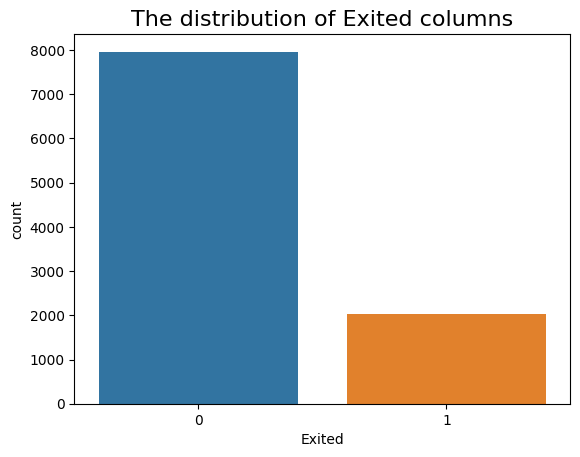

In [16]:
sns.countplot(data=data_new, x='Exited')
plt.title("The distribution of Exited column", size=16)
plt.show()

# *Data Preprocessing*

In [21]:
features = data_new.drop('Exited', axis=1)
target = data_new['Exited']

### *Data Resampling*

In [23]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42)

features_res, target_res =  sampler.fit_resample(features, target)

### *Train and Test*

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_res, target_res, test_size=0.2, random_state=42, shuffle=True, stratify=target_res)

In [25]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
1357,703,Germany,Female,29,3,122084.63,1,0,1,82824.08,0,2,PLATINUM,712
331,625,France,Male,43,4,122351.29,1,1,0,71216.60,0,4,GOLD,936
2552,774,France,Female,52,2,56580.93,1,1,0,113266.28,1,5,PLATINUM,946
3216,546,France,Female,52,2,0.00,1,1,0,137332.37,1,4,SILVER,325
806,508,France,Male,49,7,122451.46,2,1,1,75808.10,0,3,GOLD,881


# *Creating The Pipeline*

In [27]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline

steps = [
    ('encoding', FunctionTransformer(pd.get_dummies)),
    ('scaling',  StandardScaler()),
    ('pca',  PCA(n_components=2)),
    ('model',  LogisticRegression(solver='saga'))
]

clf = Pipeline(steps=steps)

clf.fit(x_train,y_train)

Pipeline(steps=[('encoding',
                 FunctionTransformer(func=<function get_dummies at 0x7f373e1ad6c0>)),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=2)),
                ('model', LogisticRegression(solver='saga'))])

In [28]:
clf.score(x_test, y_test)

0.6997549019607843

## *Model Evaluation*

### 1- *Accuracy*
### 2- *F1 Score*
### 3- *Precision*
### 4- *Recall*

In [29]:
preds = clf.predict(x_test)

In [30]:
from sklearn import metrics

In [31]:
acc_score = metrics.accuracy_score(preds, y_test)
print(acc_score)

0.6997549019607843


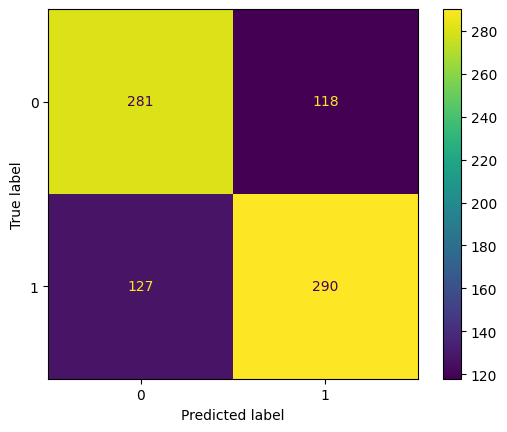

In [32]:
conf_matrics = metrics.confusion_matrix(preds, y_test)
metrics.ConfusionMatrixDisplay(conf_matrics).plot()
plt.show()

In [33]:
f_score = metrics.f1_score(preds, y_test)
f_score

0.703030303030303

In [34]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       408
           1       0.70      0.71      0.70       408

    accuracy                           0.70       816
   macro avg       0.70      0.70      0.70       816
weighted avg       0.70      0.70      0.70       816



### cross validation

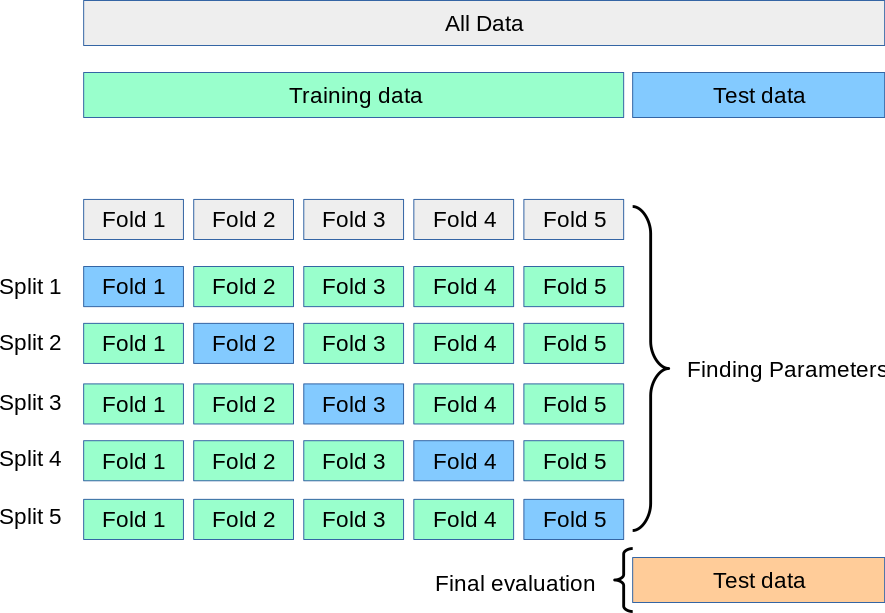

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, features_res, target_res, cv=5)
scores

array([0.71568627, 0.6993865 , 0.72147239, 0.71779141, 0.71288344])

# *HyperParameter Optimaztion*

In [36]:
from sklearn.model_selection import GridSearchCV

params = {
    'pca__n_components':[2,3,4,5,6,10, 12],
    'model__penalty':['l1', 'l2'],
    'model__C':[0.001, 0.01, 1, 10, 20]
}

grid_model = GridSearchCV(clf, params, cv=3, n_jobs=-1)
grid_model.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('encoding',
                                        FunctionTransformer(func=<function get_dummies at 0x7f373e1ad6c0>)),
                                       ('scaling', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('model',
                                        LogisticRegression(solver='saga'))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 1, 10, 20],
                         'model__penalty': ['l1', 'l2'],
                         'pca__n_components': [2, 3, 4, 5, 6, 10, 12]})

In [37]:
grid_model.best_params_

{'model__C': 1, 'model__penalty': 'l1', 'pca__n_components': 12}

In [38]:
grid_model.best_score_

0.9239279661471613

### Evaluate the optimized model

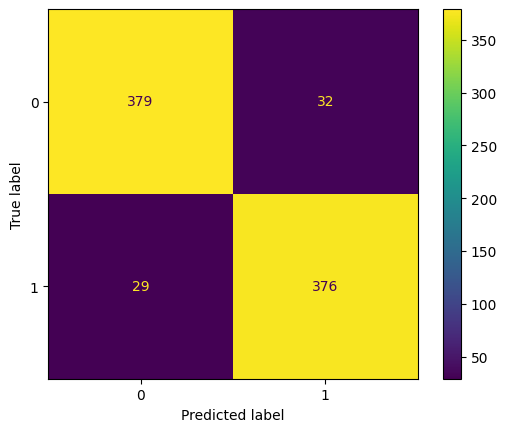

In [39]:
preds_grid = grid_model.best_estimator_.predict(x_test)

conf_matrics = metrics.confusion_matrix(preds_grid, y_test)
metrics.ConfusionMatrixDisplay(conf_matrics).plot()
plt.show()

In [40]:
print(metrics.classification_report(preds_grid, y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       411
           1       0.92      0.93      0.92       405

    accuracy                           0.93       816
   macro avg       0.93      0.93      0.93       816
weighted avg       0.93      0.93      0.93       816

